In [291]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


In the titanic dataset we are asked to judge whether or not a given passenger will survive.  We are given a set of training data with the survival outcome listed, along with a number of other inputs, and a set of test data without the survival outcome listed.  It can be considered a classification problem, or more specifically, a binary classification problem as there are only 2 classification categories, alive or dead.  We are also only considering supervised learning models, as we are using data that contains the desired outcome to train our models.  This leaves us with the following supervised learning algorithms to consider, among others:

* k-Nearest Neighbors 
* Linear Regression
* Logistic Regression
* Support Vector Machines (SVMs) 
* Decision Trees and Random Forests 
* Neural networks

I chose to use Stochastic Gradient Descent at first, which is an algorithm reasonably suited to a regression task

I started by gathering the data and creating a combined array of all the data to clean up both sets at the same time.

In [292]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
combine = [train, test]

I continued by looking at the data and picking one category to filter through an algorithm.  I had heard that male vs female was the single largest titanic predictor so I filtered that through the SGD classifier.  I chose the Stochastic Gradient Decent classifier honestly because that's the example they first use in the binary classification chapter in Hands on Machine Learning.

In [293]:
train.head()

PassengerId  Survived  Pclass    ...        Fare Cabin  Embarked
0            1         0       3    ...      7.2500   NaN         S
1            2         1       1    ...     71.2833   C85         C
2            3         1       3    ...      7.9250   NaN         S
3            4         1       1    ...     53.1000  C123         S
4            5         0       3    ...      8.0500   NaN         S

[5 rows x 12 columns]

In [294]:
test.head()

PassengerId  Pclass   ...    Cabin Embarked
0          892       3   ...      NaN        Q
1          893       3   ...      NaN        S
2          894       2   ...      NaN        Q
3          895       3   ...      NaN        S
4          896       3   ...      NaN        S

[5 rows x 11 columns]

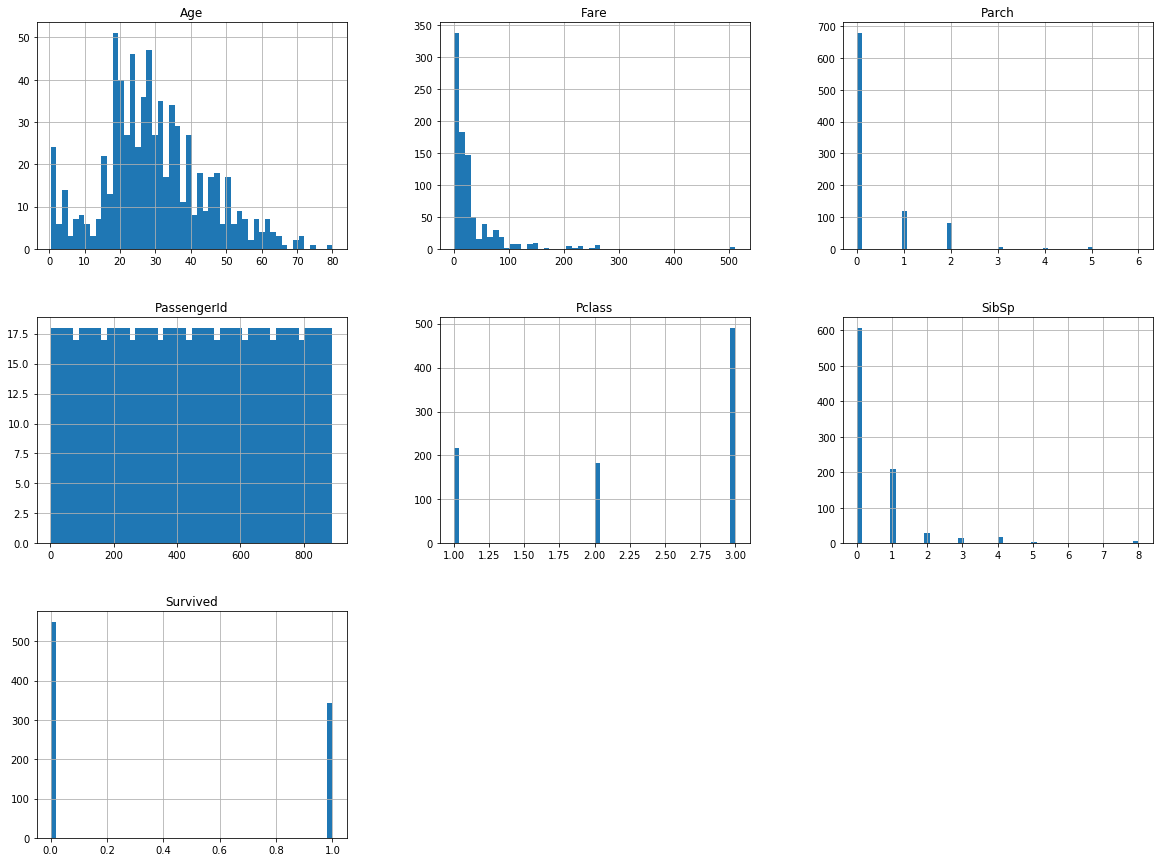

In [295]:
train.hist(bins=50, figsize=(20,15))
plt.show()

Here I mapped 0 or 1 to the male female sex category to create binary data.  Had to reshape the data and add dimensionality to feed it into the algorithm.

In [296]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})  

In [297]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
x_train = train['Sex'].values.reshape(-1, 1)
y_train = train['Survived']
sgd_clf.fit(x_train, y_train)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [298]:
sgd_clf.predict(x_train[1].reshape(-1,1))

array([1])

In [299]:
from sklearn.model_selection import cross_val_score

In [334]:
scores = cross_val_score(sgd_clf, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.81111111 0.78888889 0.38202247 0.84269663 0.79775281 0.7752809
 0.76404494 0.74157303 0.80898876 0.76136364]
Mean: 0.7473723186925435
Standard Deviation: 0.12488976262026877


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

In [301]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
1    1  0.742038
0    0  0.188908

The above shows a strong predictive correlation that seems to closely mirror the output of the classifier.  

Next I looked at the data again and dropped a bunch of columns that either had a ton of missing data such as cabin, no obvious predictive value - name, passengerId, Parch, or was very hard to work with - Ticket.

In [302]:
train.head()

PassengerId  Survived  Pclass    ...        Fare  Cabin  Embarked
0            1         0       3    ...      7.2500    NaN         S
1            2         1       1    ...     71.2833    C85         C
2            3         1       3    ...      7.9250    NaN         S
3            4         1       1    ...     53.1000   C123         S
4            5         0       3    ...      8.0500    NaN         S

[5 rows x 12 columns]

In [303]:
train = train.drop(['PassengerId','Name', 'Parch', 'Ticket', 'Cabin'], axis=1)
test = test.drop(['Name','Parch', 'Ticket', 'Cabin'], axis=1)
combined = [train, test]

In [304]:
train.head(20)

Survived  Pclass  Sex   Age  SibSp     Fare Embarked
0          0       3    0  22.0      1   7.2500        S
1          1       1    1  38.0      1  71.2833        C
2          1       3    1  26.0      0   7.9250        S
3          1       1    1  35.0      1  53.1000        S
4          0       3    0  35.0      0   8.0500        S
5          0       3    0   NaN      0   8.4583        Q
6          0       1    0  54.0      0  51.8625        S
7          0       3    0   2.0      3  21.0750        S
8          1       3    1  27.0      0  11.1333        S
9          1       2    1  14.0      1  30.0708        C
10         1       3    1   4.0      1  16.7000        S
11         1       1    1  58.0      0  26.5500        S
12         0       3    0  20.0      0   8.0500        S
13         0       3    0  39.0      1  31.2750        S
14         0       3    1  14.0      0   7.8542        S
15         1       2    1  55.0      0  16.0000        S
16         0       3    0   2.0      4  29.1250        Q
17         1       2    0   NaN      0  13.0000        S
18         0       3    1  31.0      1  18.0000        S
19         1       3    1   NaN      0   7.2250        C

This leaves us with Pclass, Sex, Age, SibSp, Fare and Embarked.  The first thing I chose to deal with is missing values. 
Age
===========
For age, I chose to replace missing values with the median age value.  This isn't ideal, finding a way to predict age based on other values or including a random value inside of the SD would add less noise, but it's the simplist solution.

In [305]:
average_age = int(train['Age'].mean())
std_age = train['Age'].std()
for dataset in combined:
    dataset['Age'].fillna(average_age, inplace=True)
    dataset['Age'] = dataset['Age'].astype(int)
train.head(100)

Survived  Pclass  Sex  Age  SibSp      Fare Embarked
0          0       3    0   22      1    7.2500        S
1          1       1    1   38      1   71.2833        C
2          1       3    1   26      0    7.9250        S
3          1       1    1   35      1   53.1000        S
4          0       3    0   35      0    8.0500        S
5          0       3    0   29      0    8.4583        Q
6          0       1    0   54      0   51.8625        S
7          0       3    0    2      3   21.0750        S
8          1       3    1   27      0   11.1333        S
9          1       2    1   14      1   30.0708        C
10         1       3    1    4      1   16.7000        S
11         1       1    1   58      0   26.5500        S
12         0       3    0   20      0    8.0500        S
13         0       3    0   39      1   31.2750        S
14         0       3    1   14      0    7.8542        S
15         1       2    1   55      0   16.0000        S
16         0       3    0    2      4   29.1250        Q
17         1       2    0   29      0   13.0000        S
18         0       3    1   31      1   18.0000        S
19         1       3    1   29      0    7.2250        C
20         0       2    0   35      0   26.0000        S
21         1       2    0   34      0   13.0000        S
22         1       3    1   15      0    8.0292        Q
23         1       1    0   28      0   35.5000        S
24         0       3    1    8      3   21.0750        S
25         1       3    1   38      1   31.3875        S
26         0       3    0   29      0    7.2250        C
27         0       1    0   19      3  263.0000        S
28         1       3    1   29      0    7.8792        Q
29         0       3    0   29      0    7.8958        S
..       ...     ...  ...  ...    ...       ...      ...
70         0       2    0   32      0   10.5000        S
71         0       3    1   16      5   46.9000        S
72         0       2    0   21      0   73.5000        S
73         0       3    0   26      1   14.4542        C
74         1       3    0   32      0   56.4958        S
75         0       3    0   25      0    7.6500        S
76         0       3    0   29      0    7.8958        S
77         0       3    0   29      0    8.0500        S
78         1       2    0    0      0   29.0000        S
79         1       3    1   30      0   12.4750        S
80         0       3    0   22      0    9.0000        S
81         1       3    0   29      0    9.5000        S
82         1       3    1   29      0    7.7875        Q
83         0       1    0   28      0   47.1000        S
84         1       2    1   17      0   10.5000        S
85         1       3    1   33      3   15.8500        S
86         0       3    0   16      1   34.3750        S
87         0       3    0   29      0    8.0500        S
88         1       1    1   23      3  263.0000        S
89         0       3    0   24      0    8.0500        S
90         0       3    0   29      0    8.0500        S
91         0       3    0   20      0    7.8542        S
92         0       1    0   46      1   61.1750        S
93         0       3    0   26      1   20.5750        S
94         0       3    0   59      0    7.2500        S
95         0       3    0   29      0    8.0500        S
96         0       1    0   71      0   34.6542        C
97         1       1    0   23      0   63.3583        C
98         1       2    1   34      0   23.0000        S
99         0       2    0   34      1   26.0000        S

[100 rows x 7 columns]

After averaging age i divided age into 5 bands and checked to see if there was a strong correlation with survival.  It looks like there's certainly some correlation.  Younger children appear more likely to survive and if you were over the age of 64 that's bad news.  I set each band with a key 0-4 to keep them in roughly the same scale as the rest of the data, that is a positive integer between 1 and 5.

In [306]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909

In [307]:
for dataset in combined:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train.head(20)

Survived  Pclass  Sex      ...           Fare  Embarked        AgeBand
0          0       3    0      ...         7.2500         S   (16.0, 32.0]
1          1       1    1      ...        71.2833         C   (32.0, 48.0]
2          1       3    1      ...         7.9250         S   (16.0, 32.0]
3          1       1    1      ...        53.1000         S   (32.0, 48.0]
4          0       3    0      ...         8.0500         S   (32.0, 48.0]
5          0       3    0      ...         8.4583         Q   (16.0, 32.0]
6          0       1    0      ...        51.8625         S   (48.0, 64.0]
7          0       3    0      ...        21.0750         S  (-0.08, 16.0]
8          1       3    1      ...        11.1333         S   (16.0, 32.0]
9          1       2    1      ...        30.0708         C  (-0.08, 16.0]
10         1       3    1      ...        16.7000         S  (-0.08, 16.0]
11         1       1    1      ...        26.5500         S   (48.0, 64.0]
12         0       3    0      ...         8.0500         S   (16.0, 32.0]
13         0       3    0      ...        31.2750         S   (32.0, 48.0]
14         0       3    1      ...         7.8542         S  (-0.08, 16.0]
15         1       2    1      ...        16.0000         S   (48.0, 64.0]
16         0       3    0      ...        29.1250         Q  (-0.08, 16.0]
17         1       2    0      ...        13.0000         S   (16.0, 32.0]
18         0       3    1      ...        18.0000         S   (16.0, 32.0]
19         1       3    1      ...         7.2250         C   (16.0, 32.0]

[20 rows x 8 columns]

SibSp
============

The next piece of data I looked at was sibsp.  This is the number of registered siblings each passenger had.  There were no missing entries, but very few entries in the higher categories.  I combined the last few numbers (4-6) into one data point, which left them at numbers 0-4 which is the same scale as the rest of our data.

In [308]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

In [309]:
for dataset in combined:
    dataset.loc[ dataset['SibSp'] >= 4, 'SibSp'] = 4

In [310]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.100000

Fare
===========

I checked to see if any fare's were missing, which they weren't, then cut the fare into 4 bands and checked to see if there were correlations.  It appears that the more one paid for their ticket, the more likely one was to survive.  After processing fare, everything except embarked is roughly on the same scale as an integer between 0 and 5.

In [311]:
train['Fare'].isnull().sum()

0

In [312]:
test['Fare'].isnull().sum()

1

In [313]:
for dataset in combined:
    dataset['Fare'].fillna(30, inplace=True)

In [314]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081

In [315]:
for dataset in combined:    
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 31.0, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [316]:
train = train.drop(['FareBand'], axis=1)

In [317]:
train = train.drop(['AgeBand'], axis=1)

In [318]:
combined[0] = train

Embarked
===========

The last piece of data to look at is embarked.  I found 2 entries in the train set that were marked null.  This data is also not in a numerical format.  The best way to deal with the data would be one-hot encoding rather than simply numerically encoding the data, which would create false scale.  I checked the correlation in embarked status and it didn't look all that strong, so I opted to just drop the data.

In [319]:
train['Embarked'].isnull().sum()

2

In [320]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957

In [321]:

combined[0] = combined[0].drop(['Embarked'], axis=1)


In [322]:
combined[1] = combined[1].drop(['Embarked'], axis=1)

In [323]:
X_train = combined[0].drop("Survived", axis=1)
Y_train = combined[0]["Survived"]
X_test  = combined[1].drop("PassengerId", axis=1).copy()

Choosing a Model
===========

After this last processing step my data is scaled properly and consists of entirely integers between 0 and 5.  Next is deciding which models to use.  I opted to try fitting the data to most of the models that were listed as possible supervised learning algorithms for a classification problem.  I did not choose to work with neural networks as that is beyond the scope of what I've explored.

In [324]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [325]:
sgd_clf2 = SGDClassifier(random_state = 42)
lng = LinearRegression()
log = LogisticRegression(random_state = 42)
svm_clf = svm.SVC(random_state = 42)
tree = tree.DecisionTreeClassifier(random_state = 42)
Rforest = RandomForestClassifier(random_state = 42)
x_train2 = X_train
y_train2 = Y_train
sgd_clf2.fit(x_train2, y_train2)
lng.fit(x_train2, y_train2)
log.fit(x_train2, y_train2)
svm_clf.fit(x_train2, y_train2)
tree.fit(x_train2, y_train2)
Rforest.fit(x_train2, y_train2)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_est

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

After fitting the data we need to test and see which algorithms scored the highest.  We weren't provided with the answers to the test data so in this case we needed to use predictions on the training set to compare the algorithms.  In this case the random forest algorithm and decision tree algorithm scored similarly.

In [326]:
forestScore = round(Rforest.score(X_train, Y_train) * 100, 2)
sgdcScore = round(sgd_clf2.score(X_train, Y_train) * 100, 2)
lngScore = round(lng.score(X_train, Y_train) * 100, 2)
logScore = round(log.score(X_train, Y_train) * 100, 2)
svm_clfScore = round(svm_clf.score(X_train, Y_train) * 100, 2)
treeScore = round(tree.score(X_train, Y_train) * 100, 2)

In [330]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 'Linear Regression','Random Forest', 'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [svm_clfScore, logScore, lngScore, forestScore, sgdcScore, treeScore]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

Model
Score                            
84.96               Random Forest
84.96               Decision Tree
82.49     Support Vector Machines
79.46  Stochastic Gradient Decent
78.90         Logistic Regression
39.03           Linear Regression

To see which of the top algorithms scored slightly better I used k-folds cross validation with 10 folds to calculate the mean and standard deviation of each method.  This essentially splits the training set into 10 different pieces, training the model on the first 9 sets, and evaluating the predictions on the final fold.  It does this 10 times to rotate each fold through as the evaluator.  In this case, the Random Forest algorithm was the winner by a slim margin! 

In [333]:
scores = cross_val_score(Rforest, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.72222222 0.75555556 0.74157303 0.83146067 0.86516854 0.85393258
 0.82022472 0.80898876 0.83146067 0.81818182]
Mean: 0.8048768584723641
Standard Deviation: 0.04599585863687754


In [335]:
scores = cross_val_score(tree, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.72222222 0.75555556 0.74157303 0.79775281 0.84269663 0.80898876
 0.82022472 0.80898876 0.82022472 0.81818182]
Mean: 0.7936409034161842
Standard Deviation: 0.037646149157762966


I learned a lot going through this project and cleaning up the data.  The titanic data set is great because it provides a relatively small and simple dataset with a lot of different tasks necessary to properly format the data.  I spent less time considering the right models to train and mostly just left everything at the defaults.  Sometime I'd like to spend a bit more time optimizing the algorithms and including a few of the data pieces I chose to leave out.  It's interesting to note that adding 5 features and training 5 different models only improved my score about 6% from only considering sex as the single variable.  I guess it goes to show how important sex was to survival on the Titanic :).